# **Stock Market Prediction And Forecasting Using Stacked LSTM**

**Importing libraries**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates


**Loading data**

In [6]:
df=pd.read_csv(r"/content/NSE-TATAGLOBAL.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


**Cheking data**

In [7]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [9]:
df.shape

(2035, 8)

In [10]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


**Cheking null value**

In [11]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [12]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

**Checking the varriable distribution type**

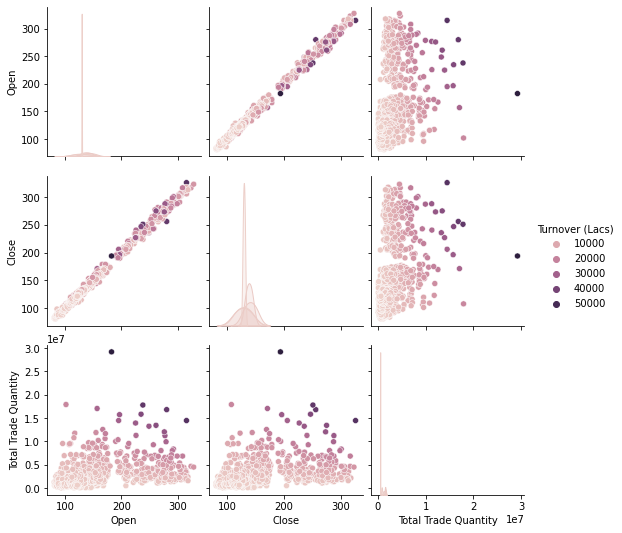

In [13]:
features = df[['Open',  'Close','Total Trade Quantity',
       'Turnover (Lacs)']]
sns.pairplot(features, hue='Turnover (Lacs)')

**Reset index**

In [14]:
df1=df.reset_index()['Close']
df1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [15]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


**Converting the Date from object to Datetime format**

In [16]:
df['Date']=pd.to_datetime(df["Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2035 non-null   datetime64[ns]
 1   Open                  2035 non-null   float64       
 2   High                  2035 non-null   float64       
 3   Low                   2035 non-null   float64       
 4   Last                  2035 non-null   float64       
 5   Close                 2035 non-null   float64       
 6   Total Trade Quantity  2035 non-null   int64         
 7   Turnover (Lacs)       2035 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 127.3 KB


In [17]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


**Plotting the varriables**

Text(0, 0.5, 'Low_share_price')

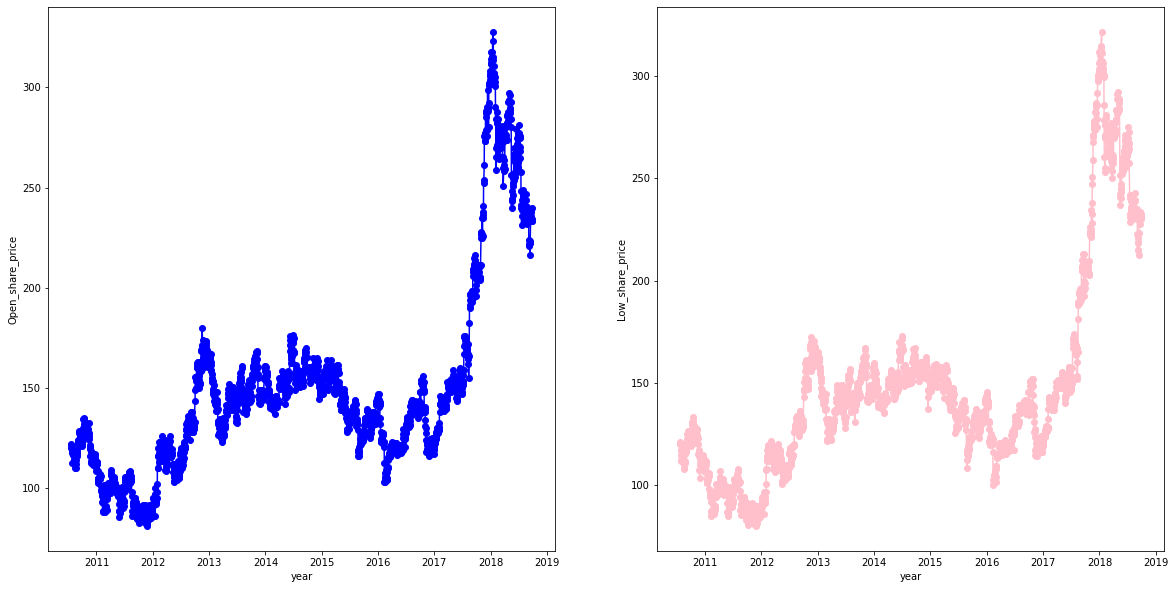

In [18]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot_date(df['Date'],df["Open"], linestyle="solid",color='Blue')
plt.xlabel("year")
plt.ylabel("Open_share_price")
plt.subplot(1,2,2)
plt.plot_date(df['Date'],df["Low"], linestyle="solid",color='pink')
plt.xlabel("year")
plt.ylabel("Low_share_price")

Text(0, 0.5, 'Last_share_price')

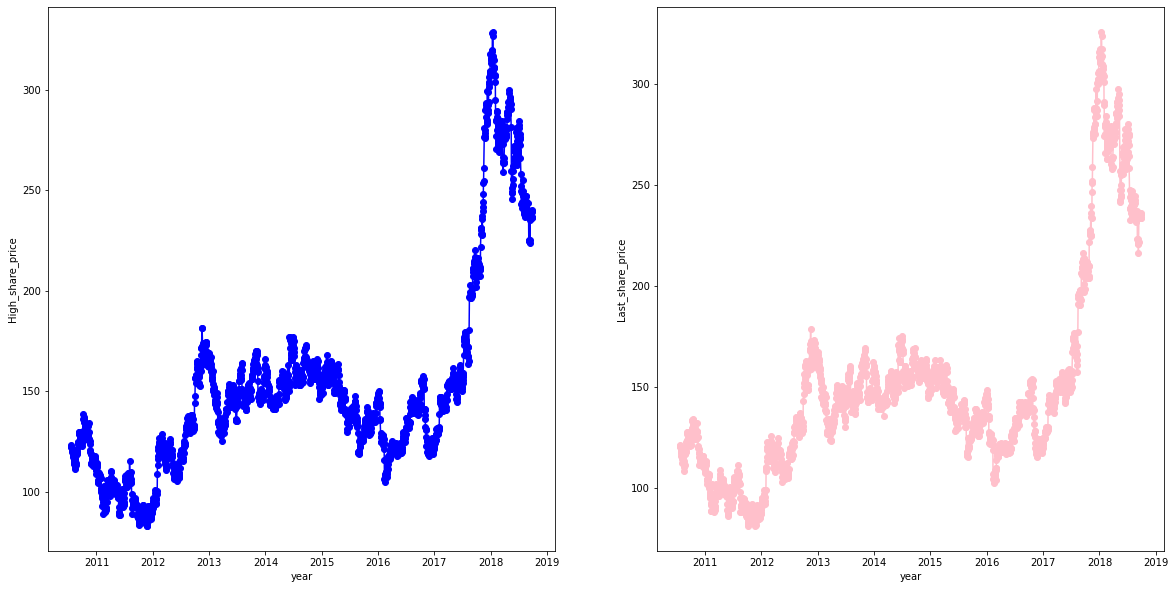

In [19]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot_date(df['Date'],df["High"], linestyle="solid",color='Blue')
plt.xlabel("year")
plt.ylabel("High_share_price")
plt.subplot(1,2,2)
plt.plot_date(df['Date'],df["Last"], linestyle="solid",color='pink')
plt.xlabel("year")
plt.ylabel("Last_share_price")

**Due to almost similar nature of variable pattern ;select close as our predicting independent variable**

In [20]:
df1=df.reset_index()["Close"]

In [27]:
df1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

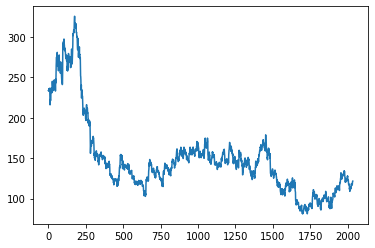

In [21]:
plt.plot(df1)

**Scallinf the value  for better prediction**

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [23]:
df1

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

**Training of data**

In [24]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [25]:
training_size,test_size

(1322, 713)

In [26]:
import numpy
def create_dataset(dataset,time_step=1):
    dataX, dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a= dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i +time_step,0])
    return numpy.array(dataX), numpy.array(dataY)

In [27]:
time_step=100
X_train,y_train=create_dataset(train_data, time_step)
X_test,y_test = create_dataset(test_data, time_step)

**Checking the shape of training and testing set of data**

In [28]:
print(X_train)

[[0.62418301 0.62214052 0.62622549 ... 0.83455882 0.86213235 0.85273693]
 [0.62214052 0.62622549 0.63378268 ... 0.86213235 0.85273693 0.87111928]
 [0.62622549 0.63378268 0.62234477 ... 0.85273693 0.87111928 0.84497549]
 ...
 [0.34517974 0.31781046 0.33047386 ... 0.2816585  0.27001634 0.26531863]
 [0.31781046 0.33047386 0.32128268 ... 0.27001634 0.26531863 0.27389706]
 [0.33047386 0.32128268 0.34007353 ... 0.26531863 0.27389706 0.25347222]]


In [29]:
print(X_train.shape), print(y_train.shape)

(1221, 100)
(1221,)


(None, None)

In [30]:
print(X_test.shape), print(y_test.shape)

(612, 100)
(612,)


(None, None)

In [31]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

**Importing the tensor flow for neurala network**

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

**Neural network formation**

In [33]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1)) 
model.compile(loss='mean_squared_error', optimizer='adam')

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


**Training the model**

In [35]:
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=100,batch_size=64, verbose=1)

Epoch 1/100
20/20 [==============================] - 10s 249ms/step - loss: 0.0320 - val_loss: 0.0023
Epoch 2/100
20/20 [==============================] - 4s 192ms/step - loss: 0.0047 - val_loss: 8.5104e-04
Epoch 3/100
20/20 [==============================] - 4s 188ms/step - loss: 0.0017 - val_loss: 7.4422e-04
Epoch 4/100
20/20 [==============================] - 4s 190ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 5/100
20/20 [==============================] - 4s 195ms/step - loss: 0.0014 - val_loss: 9.7494e-04
Epoch 6/100
20/20 [==============================] - 4s 189ms/step - loss: 0.0014 - val_loss: 8.0037e-04
Epoch 7/100
20/20 [==============================] - 4s 188ms/step - loss: 0.0016 - val_loss: 9.9185e-04
Epoch 8/100
20/20 [==============================] - 4s 189ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 9/100
20/20 [==============================] - 4s 186ms/step - loss: 0.0012 - val_loss: 9.9521e-04
Epoch 10/100
20/20 [==============================] - 4s 195ms/ste

In [36]:
import tensorflow as tf

In [37]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [39]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [40]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_test,test_predict))

28719.630518375787

In [41]:
math.sqrt(mean_squared_error(y_test,test_predict))

28719.630518375787

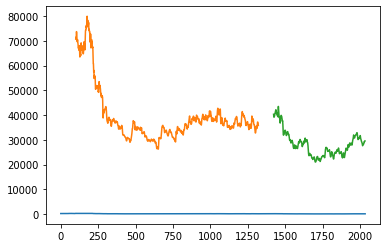

In [42]:
look_back=100
trainPredictPlot=numpy.empty_like(df1)
trainPredictPlot[:, :]= np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :]= train_predict

testPredictPlot=numpy.empty_like(df1)
testPredictPlot[:, :]= np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]= test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

**Prediction pattern in green color**